In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')

### Create dataframe of csv

In [ ]:
df = pd.DataFrame(data)


In [4]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.shape

(11914, 16)

### Checking data types

In [ ]:
print(df.dtypes)

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


### dropping Engine Fuel Type, Market Category, Vehicle Style, Popularity, Number of Doors, and Vehicle Size columns

In [ ]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

In [15]:
print(df.dtypes)

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object


## renaming columns for easier access

In [ ]:
df = df.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission'})

In [18]:
print(df)

          Make       Model  Year     HP  Cylinders Transmission  \
0          BMW  1 Series M  2011  335.0        6.0       MANUAL   
1          BMW    1 Series  2011  300.0        6.0       MANUAL   
2          BMW    1 Series  2011  300.0        6.0       MANUAL   
3          BMW    1 Series  2011  230.0        6.0       MANUAL   
4          BMW    1 Series  2011  230.0        6.0       MANUAL   
...        ...         ...   ...    ...        ...          ...   
11909    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11910    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11911    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11912    Acura         ZDX  2013  300.0        6.0    AUTOMATIC   
11913  Lincoln      Zephyr  2006  221.0        6.0    AUTOMATIC   

           Driven_Wheels  highway MPG  city mpg   MSRP  
0       rear wheel drive           26        19  46135  
1       rear wheel drive           28        19  40650  
2       rear wheel drive

### Checking for duplicate values

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (989, 10)


### Removing dupicates

In [ ]:
df = df.drop_duplicates()
print("Number of rows after removing duplicates: ", df.shape)

Number of rows after removing duplicates:  (10925, 10)


In [21]:
df.count()

Make             10925
Model            10925
Year             10925
HP               10856
Cylinders        10895
Transmission     10925
Driven_Wheels    10925
highway MPG      10925
city mpg         10925
MSRP             10925
dtype: int64

### checking for null values

In [ ]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
highway MPG       0
city mpg          0
MSRP              0
dtype: int64


### removing null values - drop not available

In [ ]:
df = df.dropna()

In [24]:
df.count()

Make             10827
Model            10827
Year             10827
HP               10827
Cylinders        10827
Transmission     10827
Driven_Wheels    10827
highway MPG      10827
city mpg         10827
MSRP             10827
dtype: int64

In [25]:
print(df.dtypes)

Make              object
Model             object
Year               int64
HP               float64
Cylinders        float64
Transmission      object
Driven_Wheels     object
highway MPG        int64
city mpg           int64
MSRP               int64
dtype: object


In [ ]:
## checking IQR f
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


9.0


<Axes: xlabel='Year'>

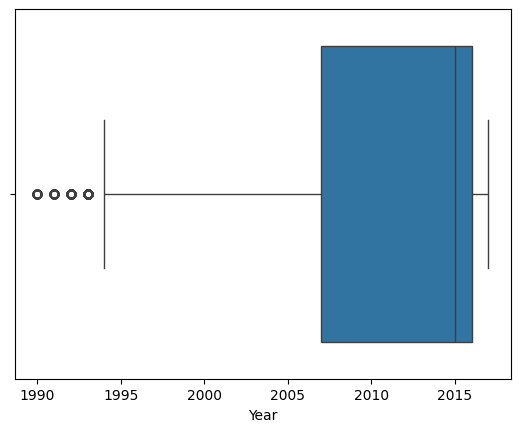

In [27]:
sns.boxplot(x=df['Year'])

In [28]:
## checking IQR 
Q1 = df['HP'].quantile(0.25)
Q3 = df['HP'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


130.0


In [30]:
## checking IQR 
Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


21327.5


<Axes: xlabel='MSRP'>

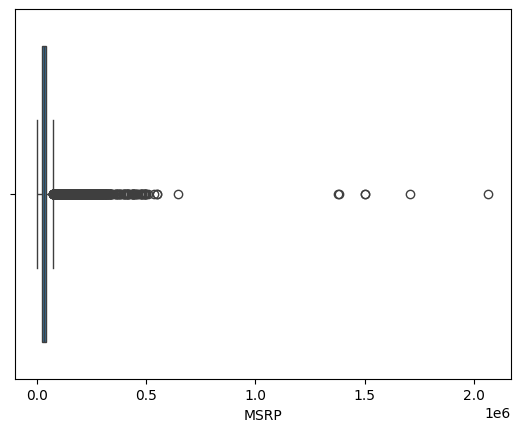

In [31]:
sns.boxplot(x=df['MSRP'])

## Creating bar graph on a single variable 

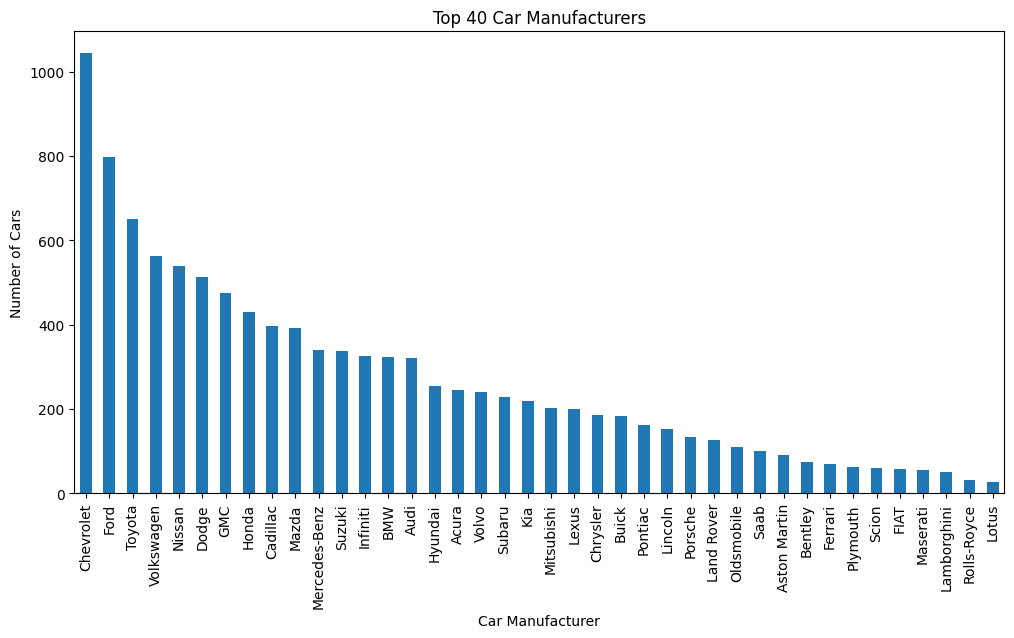

In [32]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(12,6))
plt.title('Top 40 Car Manufacturers')
plt.xlabel('Car Manufacturer')
plt.ylabel('Number of Cars')
plt.show()

### Dropping all object type columns

In [ ]:
df = df.select_dtypes(exclude=['object'])
print(df)

       Year     HP  Cylinders  highway MPG  city mpg   MSRP
0      2011  335.0        6.0           26        19  46135
1      2011  300.0        6.0           28        19  40650
2      2011  300.0        6.0           28        20  36350
3      2011  230.0        6.0           28        18  29450
4      2011  230.0        6.0           28        18  34500
...     ...    ...        ...          ...       ...    ...
11909  2012  300.0        6.0           23        16  46120
11910  2012  300.0        6.0           23        16  56670
11911  2012  300.0        6.0           23        16  50620
11912  2013  300.0        6.0           23        16  50920
11913  2006  221.0        6.0           26        17  28995

[10827 rows x 6 columns]


In [35]:
print(df.dtypes)

Year             int64
HP             float64
Cylinders      float64
highway MPG      int64
city mpg         int64
MSRP             int64
dtype: object


### Finding coorelation between different numerical variables

<Axes: >

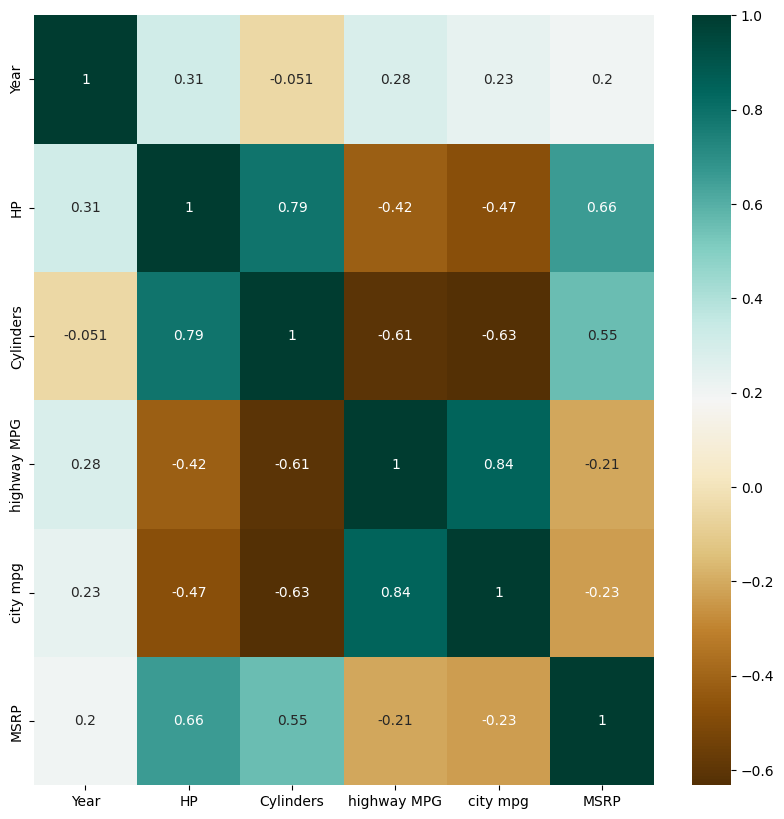

In [37]:
c = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(c, annot=True, cmap='BrBG')

## Scatter Plot between two numerical variables

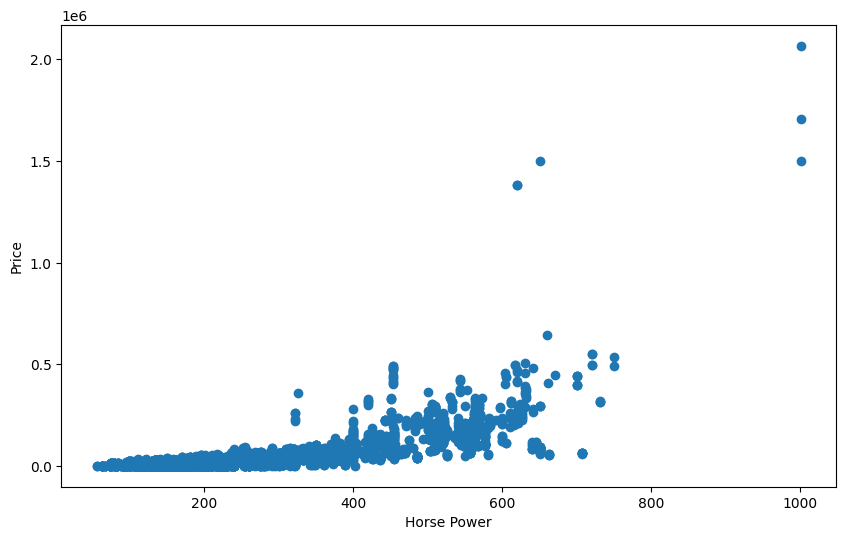

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['MSRP'])
ax.set_xlabel('Horse Power')
ax.set_ylabel('Price')
plt.show()